# [PCS3635] Análise de Dados

In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [14]:
df = pd.read_csv('encoded_data.csv')

## Descrição Básica do Dataframe 

In [15]:
df.head()

,date,PA_1,PA_2,PA_3,PA_4,PA_5,PA_6,PA_7,PA_8,PA_8_1,...,PS_4_2,PS_4_3,PS_4_4,PS_4_5,PS_5,PS_6,PS_7_1,PS_7_2,PS_7_3,PS_8
0,22/04/2024 15:22:50,1,4,8.0,12.0,4,3,5,"Se atrasar com o conteúdo outras disciplinas, ...",1.0,...,2.0,2.0,1.0,1.0,-5.0,1.0,2.0,1.0,0.0,NaN
1,22/04/2024 15:23:42,1,1,12.0,40.0,4,1,5,"Se atrasar com o conteúdo outras disciplinas, ...",1.0,...,3.0,2.0,2.0,2.0,5.0,1.0,0.0,2.0,1.0,O fato de LabDig exigir mais tempo que o norma...
2,22/04/2024 15:24:48,2,4,8.0,9.0,2,1,2,Falta de tempo para o EP de [PCS3616] Sistemas...,0.0,...,3.0,3.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,NaN
3,22/04/2024 15:29:14,2,4,6.0,30.0,4,3,4,"Se atrasar com o conteúdo outras disciplinas, ...",1.0,...,4.0,4.0,4.0,4.0,5.0,1.0,0.0,0.0,0.0,"A matéria em si foi exigente, foi puxada, p..."
4,22/04/2024 15:43:26,1,5,1.0,10.0,1,1,1,NaN,0.0,...,5.0,5.0,5.0,5.0,15.0,0.0,0.0,0.0,0.0,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     31 non-null     object 
 1   PA_1     31 non-null     int64  
 2   PA_2     31 non-null     int64  
 3   PA_3     29 non-null     float64
 4   PA_4     28 non-null     float64
 5   PA_5     31 non-null     int64  
 6   PA_6     31 non-null     int64  
 7   PA_7     31 non-null     int64  
 8   PA_8     29 non-null     object 
 9   PA_8_1   27 non-null     float64
 10  PA_8_2   31 non-null     int64  
 11  PA_8_3   31 non-null     int64  
 12  PA_8_4   31 non-null     int64  
 13  PA_8_5   30 non-null     float64
 14  PA_8_6   31 non-null     int64  
 15  PA_8_7   31 non-null     int64  
 16  PA_8_8   31 non-null     int64  
 17  PA_8_9   31 non-null     int64  
 18  PA_9     28 non-null     float64
 19  PA_10    31 non-null     int64  
 20  PA_11_1  29 non-null     float64
 21  PA_11_2  29 non-nu

In [19]:
df.shape

(31, 53)

## Configuração das Figuras

In [20]:
size = (6, 8)

## Pesquisa Acadêmica

### PA_1
De qual turma você faz parte?<br>
- (a) Segunda-Feira<br>
- (b) Quarta-Feira

In [47]:
PA_1 = df['PA_1']

# separation by groups
monday_df = df[df['PA_1'] == 1]
wednesday_df = df[df['PA_1'] == 2]

PA_1.shape, monday_df.shape, wednesday_df.shape

((31,), (11, 53), (20, 53))

In [41]:
# total number of students per group
monday_total_n = 38
wednesday_total_n = 27

# total number of students that answered the research per group
monday_total_n_answered = monday_df.shape[0]
wednesday_total_n_answered = wednesday_df.shape[0]

# n answers / n students per group
monday_fraction_answered = monday_total_n_answered/monday_total_n
wednesday_fraction_answered = wednesday_total_n_answered/wednesday_total_n

# n answers / n students per group in percentage
monday_fraction_answered_percentage = 100*monday_fraction_answered
wednesday_fraction_answered_percentage = 100*wednesday_fraction_answered

groups = {
    'monday_total_n': monday_total_n,
    'wednesday_total_n': wednesday_total_n,
    'monday_total_n_answered': monday_total_n_answered,
    'wednesday_total_n_answered': wednesday_total_n_answered,
    'monday_fraction_answered': monday_fraction_answered,
    'wednesday_fraction_answered': wednesday_fraction_answered,
    'monday_fraction_answered_percentage': monday_fraction_answered_percentage,
    'wednesday_fraction_answered_percentage': wednesday_fraction_answered_percentage
}

groups

{'monday_total_n': 38,
 'wednesday_total_n': 27,
 'monday_total_n_answered': 11,
 'wednesday_total_n_answered': 20,
 'monday_fraction_answered': 0.2894736842105263,
 'wednesday_fraction_answered': 0.7407407407407407,
 'monday_fraction_answered_percentage': 28.947368421052634,
 'wednesday_fraction_answered_percentage': 74.07407407407408}

In [43]:
# resume
PA_1_resume = {
    'turma': ['monday', 'wednesday'],
    'total de alunos': [groups['monday_total_n'], groups['wednesday_total_n']],
    'quantidade de respostas': [groups['monday_total_n_answered'], groups['wednesday_total_n_answered']],
    'quantidade de respostas (%)': [groups['monday_fraction_answered_percentage'], groups['wednesday_fraction_answered_percentage']]
}

PA_1_resume_table = pd.DataFrame(PA_1_resume)

PA_1_resume_table

,turma,total de alunos,quantidade de respostas,quantidade de respostas (%)
0,monday,38,11,28.947368
1,wednesday,27,20,74.074074


### PA_2
A disciplina possuiu dois créditos de trabalho (3h20/semana). O tempo gasto por você com a disciplina, em período fora de sala de aula, ficou dentro desse limite?
- (a) Foi muito abaixo desse limite
- (b) Foi abaixo do limite
- (c) Foi adequado
- (d) Foi acima desse limite
- (e) Foi muito acima do limite

In [48]:
PA_2 = df['PA_2']
PA_2_monday = monday_df['PA_2']
PA_2_wednesday = wednesday_df['PA_2']

PA_2.shape, PA_2_monday.shape, PA_2_wednesday.shape

((31,), (11,), (20,))

In [77]:
PA_2_classes = [1, 2, 3, 4, 5]

# index mapping
PA_2_categories_mapping = {
    1: 'muito abaixo',
    2: 'abaixo',
    3: 'adequado', 
    4: 'acima',
    5: 'muito acima'
}

# categories
PA_2_categories = [PA_2_categories_mapping[PA_2_class] for PA_2_class in PA_2_classes]

# counting categories
PA_2_counting = PA_2.value_counts()
PA_2_monday_counting = PA_2_monday.value_counts()
PA_2_wednesday_counting = PA_2_wednesday.value_counts()

# filling with 0 non observed categories
PA_2_counting = PA_2_counting.reindex(PA_2_classes, fill_value=0)
PA_2_monday_counting = PA_2_monday_counting.reindex(PA_2_classes, fill_value=0)
PA_2_wednesday_counting = PA_2_wednesday_counting.reindex(PA_2_classes, fill_value=0)

print(f'PA_2_counting\nlenght: {len(PA_2_counting)}\narray: {PA_2_counting}\n')
print(f'PA_2_monday_counting\nlenght: {len(PA_2_monday_counting)}\narray: {PA_2_monday_counting}\n')
print(f'PA_2_wednesday_counting\nlenght: {len(PA_2_wednesday_counting)}\narray: {PA_2_wednesday_counting}\n')

PA_2_counting
lenght: 5
array: 1     1
2     0
3     0
4    13
5    17
Name: PA_2, dtype: int64

PA_2_monday_counting
lenght: 5
array: 1    1
2    0
3    0
4    5
5    5
Name: PA_2, dtype: int64

PA_2_wednesday_counting
lenght: 5
array: 1     0
2     0
3     0
4     8
5    12
Name: PA_2, dtype: int64



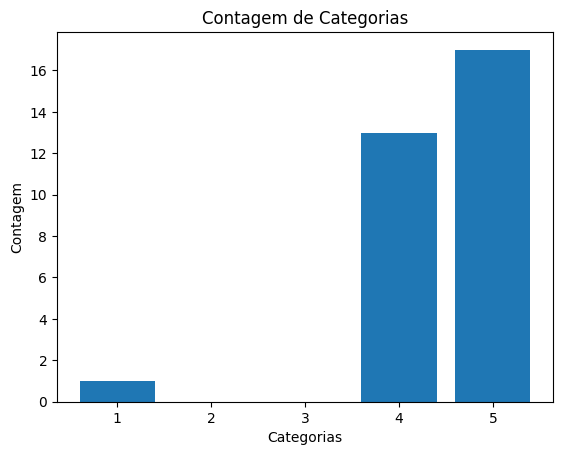

In [74]:
plt.bar(PA_2_classes, PA_2_counting)

plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.title('Contagem de Categorias')

# Exibindo o gráfico
plt.show()

### PA_3

### PA_4

### PA_5

### PA_6

### PA_7

### PA_8

### PA_9

### PA_10

### PA_11

### PA_12

## Pesquisa de Saúde

### PS_1

### PS_1

### PS_2

### PS_3

### PS_4

### PS_5

### PS_6

### PS_7

### PS_8